# Choose a Data Set

Create your own dataset by scraping one of the following websites *(level 5)*:
- [Wikipedia](https://www.wikipedia.org/)
- [OpenLibrary](https://openlibrary.org/)

**OR** 

Use data gathered from one of the following APIs *(level 4)*: 
- [TMDB](https://developer.themoviedb.org/reference/intro/getting-started)
- [College Scorecard](https://collegescorecard.ed.gov/data/api-documentation/)

**OR** 

Pick a JSON dataset *(level 3)*:
- [Food/Restaurant Data](https://drive.google.com/drive/folders/1V94S6WpclvQmbnW88KVMD4EruryA1oma?usp=drive_link)
- [Fashion Data](https://drive.google.com/drive/folders/1V8SbFjtRRW8WVf3xBzg0gzLjOtMhHea_?usp=drive_link)

**OR** 

Pick a CSV dataset *(level 2)*:
- [LA Parking Tickets](https://drive.google.com/drive/folders/1vaOfwMi6QmZEGsXr8VM0ulPGzvTTBCgm?usp=drive_link)
- [Hotels](https://drive.google.com/drive/folders/1IpVFxgwBJvJHKoOuBsk6WK2qYqFYP4hi?usp=drive_link)

# My Question
### Write your question here.

Given a random book in the Open Library, what is the expected amount of pages?

# My Answer

In [24]:
import requests
from bs4 import BeautifulSoup
import random
from tqdm import tqdm
import pandas as pd
import re
import time
import seaborn as sns

In [25]:
books={'Title':[],
       'Number of Pages':[]}
url='https://openlibrary.org/random'
count=int(input('how many random books?'))

how many random books?200


In [36]:
with tqdm(total=count, desc="Processing...") as pbar:
    for _ in range(count):
        time.sleep(.5)
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        Title=soup.find('h1', class_="work-title")
        if Title is None: 
            pbar.update(1)

            continue
        page_count=soup.find('span', class_='edition-pages')
        if page_count is None:
            pbar.update(1)

            continue
        pbar.update(1)
        books['Title'].append(Title)
        books['Number of Pages'].append(page_count)

booksdf=pd.DataFrame(books)
booksdf.info()
success_rate=len(booksdf)/count
print(f'We have a success rate of {success_rate}.')

Processing...: 100%|██████████| 244/244 [27:16<00:00,  6.71s/it]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            494 non-null    object
 1   Number of Pages  494 non-null    object
dtypes: object(2)
memory usage: 7.8+ KB
We have a success rate of 2.0245901639344264.


Note: I reran the code as the success rate was quite minimal. This the higher success rate represents the amount of data I have 

In [37]:
booksdf.head()


,Title,Number of Pages
0,[Le masque de velours],[305]
1,[How to Use the Internet (4th Edition)],[232]
2,[The prose rhythm of Sallust and Livy],[151]
3,[Papyrus],[90]
4,"[""Joss Stone""]",[96]


In [38]:
# Alternate between code for analysis and markdown descriptions of your analysis
#doing code for expected value
expected_value=0
booksdf['Number of Pages'] = booksdf['Number of Pages'].apply(
    lambda x: int(''.join(filter(str.isdigit, str(x))))  # This part was necessary since the number of pages was saved in brackets.
)

for count in booksdf['Number of Pages']:
    probability=1/len(booksdf)
    tmp=probability*count
    expected_value+=tmp
print(f'The expected value for the amount of pages of a random book is {expected_value}.')

The expected value for the amount of pages of a random book is 231.32591093117406.


The expected value is 231.2359 pages. This was caluclated by using the expected value equation which is the sum of the probability times the actual value. In other words, I calculated the probability as 1 divided by the length of the dataset (as that is the probability for each book). I then multiplied that probability by the actual page count for each respective book. I then added all the values to get the expected value of 231.2359 pages. The reason that the final expected value is not a whole number is because you can parts of pages filled up. It is possible that the entire pages are not filled out.

In [40]:
# To find variance we use the standard deviation of the expected value
total=0
mean=sum(booksdf['Number of Pages'])/len(booksdf)
squared_differences=0
for i in booksdf['Number of Pages']:
    squared_difference=(i-mean)**2
    squared_differences+=squared_difference
variance=squared_differences/len(booksdf)
standard_deviation=variance**.5
print(f'The standard deviation is {standard_deviation}.')
print(f'The mean is {mean}.')

The standard deviation is 203.15782604686737.
The mean is 231.3259109311741.


The standard deviation is 203.1578. This means that 68% of the data is within 203.157 pages. Therefore, while the expected value for the amount of pages is 231.3259, it is possible that the actual amount of pages can vary greatly. The higher the standard deviation the more variability. This variability makes sense as the books are randomly chosen. It is entirely possible that books as advanced as War and Peace or as simple as picture books have been chosen. 

In [43]:
print(len(booksdf))

494


<AxesSubplot:xlabel='Number of Pages', ylabel='Count'>

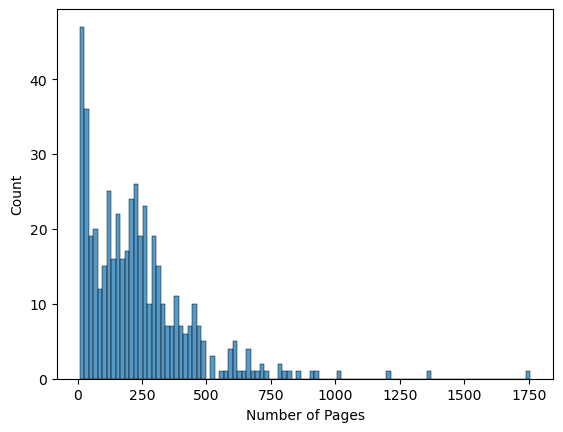

In [42]:
sns.histplot(data=booksdf, x='Number of Pages', bins=100)

The general distribution from the histogram is very skewed right. This can be seen as so much of the data is on the left. This general distribution affirms the expected value and the standard deviation. The majority of the data is around 231 pages. Thus, the expected value (aka the mean) is accurate. However, we can easily see that there are outliers (with one being as extreme as around 1750 pages). Thus, there is clearly a lot of variability, but the largest chunk is within 200 pages of 231. Overall, this graph affirms my expected value and my standard deviation.

# Final Answer


I had to address this question: given a random book in the Open Library, what is the expected amount of pages for a randomly selected book? By using the expected value formula, I found the expected value to be 231.325 pages. This is supported by the graph as that is where a lot of the data is. However, one must also understand the spread of the data around that expected value. The expected value is not completely accurate after all. By using the standard deviation formula, I have found the standard deviation to be 203.157 pages. This means that about 68% of the data is within a range of 203 pages of 231 pages. Put simply, 68% of the data is between 28 pages and 434 pages. This shows that the distribution of data is very wide. This is also affirmed by the general distribution graph where the largest chunks of data is within that range. As such, the expected value,  while not inaccurate, is not perfectly reflective of the data. This makes sense given that books were chosen at random. In reality, while you can expect the amount of pages to be generally within that range, the possibility still exists for massive outliers such as the book with over 1500 pages. These conclusions have been reached with a sample size of 494 books.